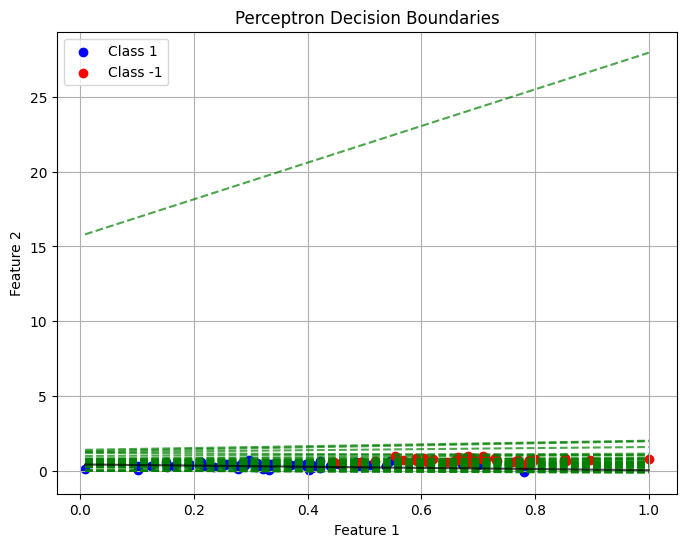

In [23]:
#question 1 / first part
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("data.csv", header=None)
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values
y[y == 0] = -1  # Convert class 0 to -1 if needed

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

X_tensor.shape, y_tensor.shape

# Parameters
learning_rate = 0.01
epochs = 10

# Initialize weights and bias
weights = torch.zeros((2, 1), dtype=torch.float32)
bias = torch.zeros(1, dtype=torch.float32)

# Store lines for plotting
lines = []

# Training loop
for epoch in range(epochs):
    error_count = 0
    for i in range(X_tensor.shape[0]):
        xi = X_tensor[i].view(1, -1)
        yi = y_tensor[i]
        output = torch.matmul(xi, weights) + bias
        if yi * output <= 0:
            weights += learning_rate * yi * xi.view(2, 1)
            bias += learning_rate * yi
            error_count += 1
            # Store decision boundary line
            w = weights.numpy()
            b = bias.item()
            slope = -w[0][0] / w[1][0]
            intercept = -b / w[1][0]
            lines.append((slope, intercept))
    if error_count == 0:
        break

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

# Plot lines
x_vals = torch.linspace(min(X[:, 0]), max(X[:, 0]), 100).numpy()
for i, (m, c) in enumerate(lines):
    y_vals = m * x_vals + c
    color = 'green' if i < len(lines) - 1 else 'black'
    style = '--' if i < len(lines) - 1 else '-'
    plt.plot(x_vals, y_vals, style, color=color, alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundaries")
plt.legend()
plt.grid(True)
plt.show()

The scatter plot shows two classes: typically labeled +1 and -1, using different colors (e.g., red and blue).
If the classes are linearly separable, you'll notice a visible "gap" or separation between them.
If there's overlap, the perceptron may not converge, and the boundary will oscillate.

The Red Line
The red line represents the starting weights (typically zero), resulting in a boundary line through the origin.
It usually doesn't separate the classes correctly — it's just a visual baseline.
This shows that the model starts with no knowledge, and the perceptron must learn the correct orientation.

The Green Lines
Every time the perceptron misclassifies a point, it updates the weights.
These updates cause the decision boundary to shift — each new green dashed line represents one such shift.
You may observe:
Large shifts early on when errors are frequent.
Smaller, more refined adjustments later as the model homes in on a good boundary.
This progression visually demonstrates the learning process of the algorithm.

The Black Line(the final decision)
The solid black line represents the final weights after training
If the data is linearly separable, this line should cleanly divide the two classes with no misclassifications.
If not linearly separable:
The black line may oscillate or settle on an imperfect boundary.
The perceptron might not converge, depending on the learning rate and iteration cap.

How does the learning rate affect this?
A larger learning rate will result in larger jumps which may make training faster but could also lead to it being more inaccurate.



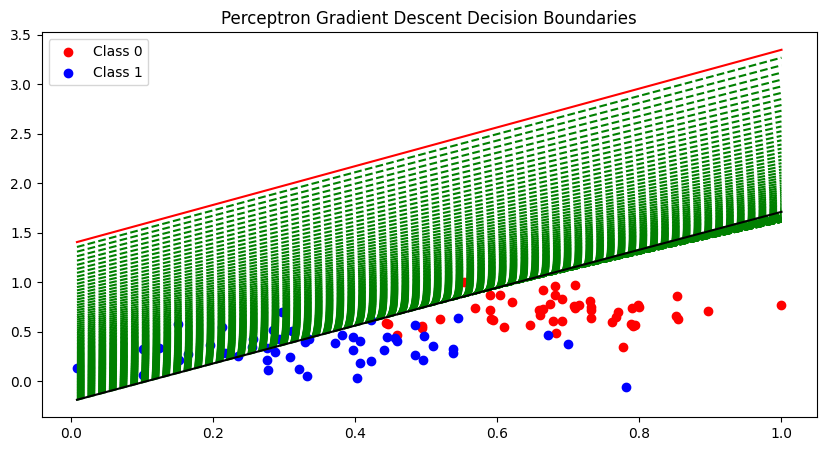

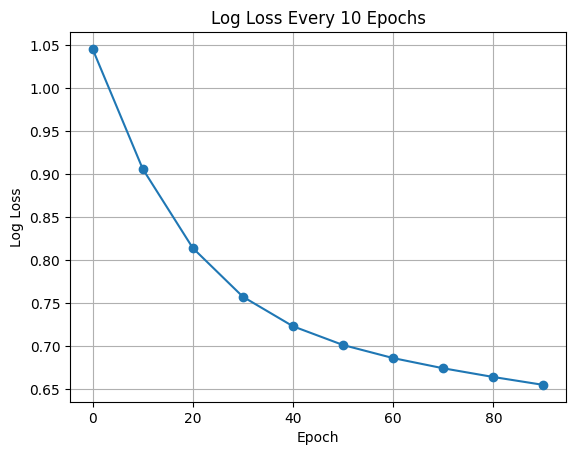

In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('data.csv', header=None)
X = df[[0, 1]].values
y = df[2].values

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

# Add bias term to input
X_b = torch.cat([X_tensor, torch.ones((X_tensor.shape[0], 1))], dim=1)

# Initialize weights randomly
weights = torch.randn((3, 1), requires_grad=True)

# Hyperparameters
learning_rate = 0.1
epochs = 100
log_losses = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# Binary Cross Entropy Loss
def log_loss(y_pred, y_true):
    epsilon = 1e-7  # avoid log(0)
    return -(y_true * torch.log(y_pred + epsilon) + (1 - y_true) * torch.log(1 - y_pred + epsilon)).mean()

# Plot data
plt.figure(figsize=(10, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')

# Plot function
def plot_boundary(w, color, linestyle='-'):
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    w_np = w.detach().numpy().flatten()
    y_vals = -(w_np[0] * x_vals + w_np[2]) / (w_np[1] + 1e-6)
    plt.plot(x_vals, y_vals, color=color, linestyle=linestyle)

# Initial red boundary
plot_boundary(weights, color='red')

# Training loop
for epoch in range(epochs):
    # Forward pass
    z = X_b @ weights
    y_pred = sigmoid(z)

    # Compute loss
    loss = log_loss(y_pred, y_tensor)

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        weights -= learning_rate * weights.grad
        weights.grad.zero_()

    # Plot green dashed line each epoch
    plot_boundary(weights, color='green', linestyle='--')

    # Save loss every 10 epochs
    if epoch % 10 == 0:
        log_losses.append(loss.item())

# Final boundary in black
plot_boundary(weights, color='black')
plt.title('Perceptron Gradient Descent Decision Boundaries')
plt.legend()
plt.show()

# Plot log loss curve
plt.figure()
plt.plot(np.arange(0, epochs, 10), log_losses, marker='o')
plt.title('Log Loss Every 10 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

If I were to increase the learning rate with the gradient version it would converge at earlier stages in the learning process. It may overshoot the optimal boundaries and it can possibly osscolate back and forth across the line.
If I were to decrease the learning rate it may be more accurate but it will take longer to reach that conclusion but it will have more smooth weight updates incomparision to a higher learning rate.
If I were to change the epochs to less then the model might not converge and stop before it reaches a proper spot and loss remains high.
If I were to have sufficient the epochs then the data will converge and the log loss will eventually plateu
If I were to add more like too many then it may add unnecessary computation. And for more noisy data sets it may add cause overfitting.